<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Intro_IA_Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos de búsqueda a ciegas

In [ ]:
import pydot
from IPython.display import Image, display
import queue
import numpy as np


# Clase Node, para representar los nodos del árbol de búsqueda

In [ ]:
class Node():
  def __init__(self,state,value,operators, operator=None, parent=None,objective=None):
    self.state=state
    self.value=value
    self.children=[]
    self.parent=parent
    self.operator=operator
    self.operators=operators
    self.objective=objective
    self.level=0

  def add_child(self,value,state,operator):
    node =type(self)(value=value, state=state, operator=operator, parent=self, operators=self.operators)
    node.level=node.parent.level+1
    self.children.append(node)
    return node

  def add_node_child(self, node):
    node.level=node.parent.level+1
    self.children.append(node)
    return node 


  #Devuelve todos los estados segun los operadores aplicados
  def getchildrens(self):
    return[
           self.getState(i)
            if not self.repeatStatePath(self.getState(i))
              else None for i, op in enumerate(self.operators)]

  def getState(self, index):
    pass

  def __eq__(self, other):
    return self.state==other.state

  def __lt__(self, other):
    return self.f() < other.f()

  def repeatStatePath(self, state):
    n=self
    while n is not None and n.state!=state:
      n=n.parent
    return n is not None

  def pathObjective(self):
    n=self
    result=[]
    while n is not None:
      result.append(n)
      n=n.parent
    return result

  def printPath(self):
    stack=self.pathObjective()
    while len(stack) !=0:
      node=stack.pop()
      if node.operator is not None:
        print(f"operador: {self.operators[node.operator]} \t estado:{node.state}")
      else:
        print(f"estado:{node.state}")

  def cost(self):
    return 1

  def f(self):
    return self.cost()


# Búsqueda primero a lo ancho

In [ ]:
def breadthFirst(root, endState):
    pq=queue.Queue()
    pq.put(root)
    while not pq.empty():
      node=pq.get()
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
          pq.put(newChild)
          if endState==child:
            return (root, newChild)

# Función para dibujar

In [ ]:
def draw(root,path):
    graph = pydot.Dot(graph_type='graph')
    nodeGraph=pydot.Node(str(root.state)+"-"+str(0),
                         label=str(root.state),shape ="circle", 
                         style="filled", fillcolor="red")
    graph.add_node(nodeGraph)
    path.pop()
    return drawTreeRec(root,nodeGraph,graph,0,path.pop(),path)
    
def drawTreeRec(root,rootGraph,graph,i,topPath,path):
    if root is not None:
      children=root.children
      for j,child in enumerate(children):
        i=i+1
        color="white"
        if topPath.value==child.value:
          if len(path)>0:topPath=path.pop()
          color='red'
        c=pydot.Node(child.value,label=str(child.state)+r"\n"+r"\n"+"f="+str(child.f()), 
                     shape ="circle", style="filled", 
                     fillcolor=color)
        graph.add_node(c)
        graph.add_edge(pydot.Edge(rootGraph, c, 
                                  label=str(child.operator)+'('+str(child.cost())+')'))
        graph=drawTreeRec(child,c,graph,i,topPath,path)  # recursive call
      return graph
    else:
      return graph   


In [ ]:
class Jarra(Node): 
  
  def getState(self, index):
    state=self.state
    nextState=None
    if index==0: 
      if state[0]<3: 
        nextState=[3,state[1]] 
      else:
        nextState=None
    elif index==1: 
      if state[1]<4: 
        nextState=[state[0],4]
      else:
        nextState=None
    elif index==2: 
      if state[0]>0: 
        nextState=[0,state[1]] 
      else:
        nextState=None
    elif index==3: 
      if state[1]>0: 
        nextState=[state[0],0] 
      else:
        nextState=None
    elif index==4: nextState=self.trasvasar3L4L(state)
    elif index==5: nextState=self.trasvasar4L3L(state)
    return nextState if state!=nextState else None
 
  def trasvasar4L3L(self, state):
    t=min(3-state[0],state[1])
    return [state[0]+t,state[1]-t]
  
  def trasvasar3L4L(self, state):
    t=min(state[0],4-state[1])
    return [state[0]-t,state[1]+t]
  
  #Costo acumulativo(valor 1 en cada nivel)
  def cost(self):
    return self.level

In [ ]:
operators=['0- llenar jarra de 3 litros','1- llenar jarra de 4 litros',
           '2- vaciar jarra de 3 litros',
           '3- vaciar jarra de 4 litros',
           '4- trasvasar de 3-4',
           '5- trasvasar de 4-3']
initState=[0,0]
endState=[0,2]

estado:[0, 0]
operador: 0- llenar jarra de 3 litros 	 estado:[3, 0]
operador: 4- trasvasar de 3-4 	 estado:[0, 3]
operador: 0- llenar jarra de 3 litros 	 estado:[3, 3]
operador: 4- trasvasar de 3-4 	 estado:[2, 4]
operador: 3- vaciar jarra de 4 litros 	 estado:[2, 0]
operador: 4- trasvasar de 3-4 	 estado:[0, 2]


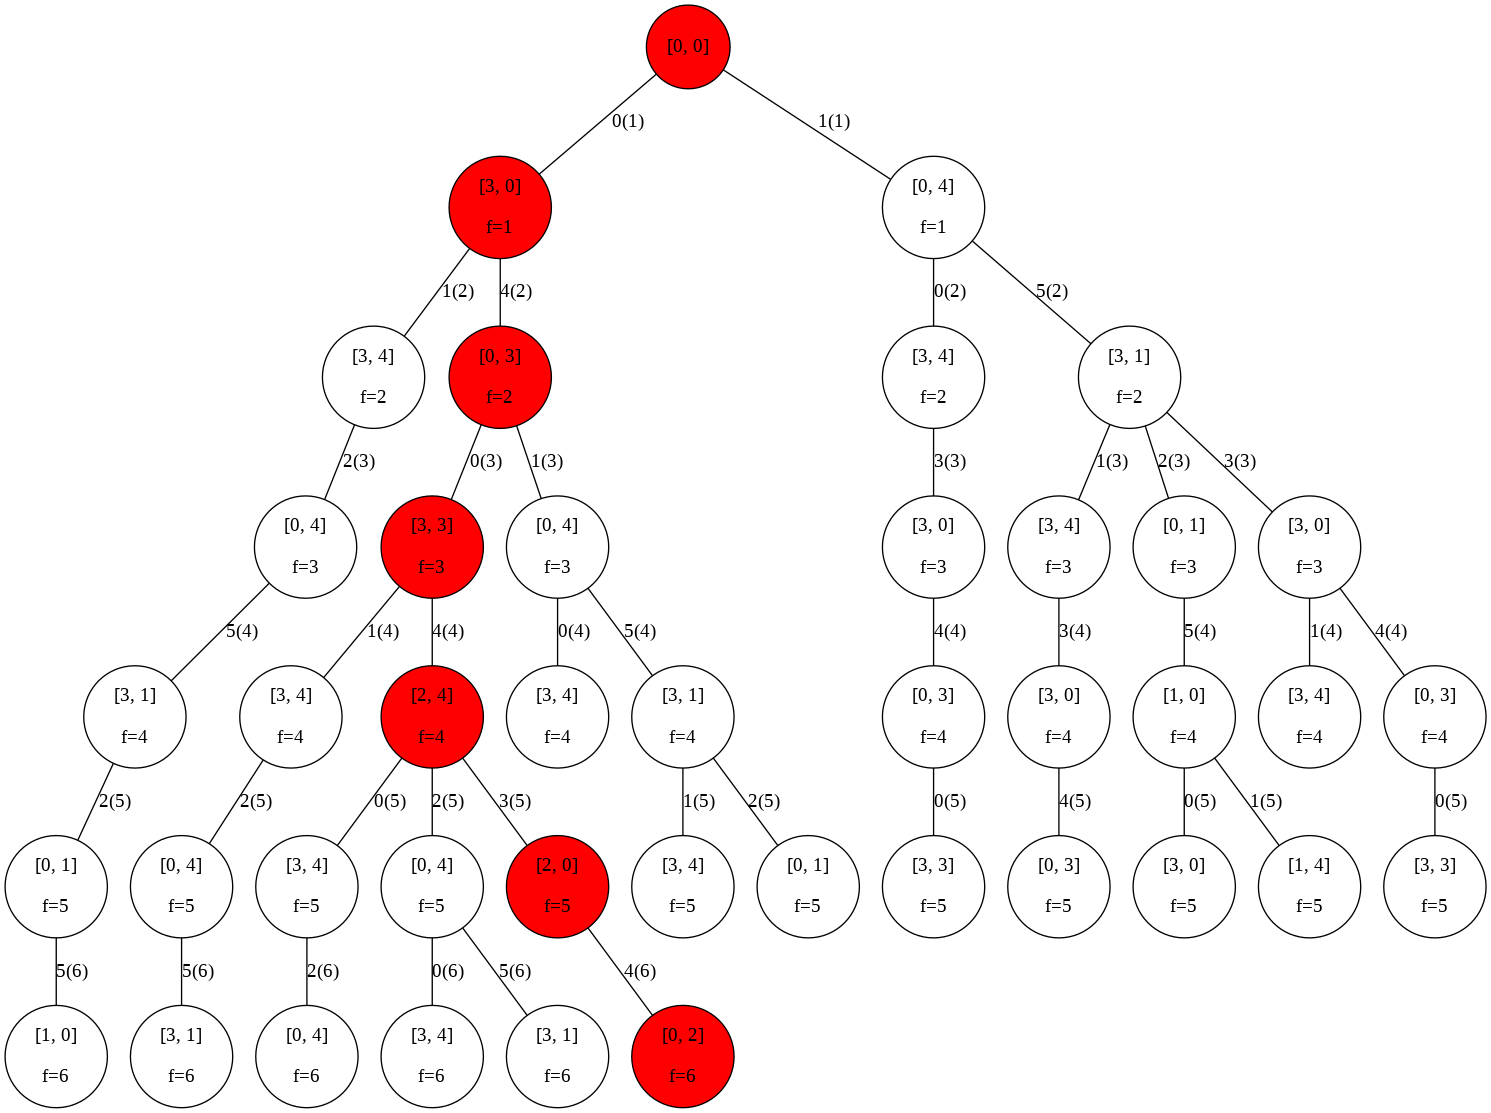

In [ ]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)=breadthFirst(jarra,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=900, height=700)
display(tree_image)